Copyright (c) 2017 Andrew Johnson, Dan Kotlyar, GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Results Reader

# #  Basic operations

In [2]:
%matplotlib notebook
import numpy as np
import serpentTools
from serpentTools.settings import rc

Basic operations include read and 1-D plot capabilities

In [3]:
resFile = 'IC_FA_res.m'
res = serpentTools.read(resFile)

# Metadata

metadata is a collective data that describe the problem.
The following data is included:titles, data paths, etc are present inside the reader 

In [4]:
print(res.metadata['version'])  # Serpent version used for the execution
print(res.metadata['decayDataFilePath'])  # Directory path for data libraries
print(res.metadata['inputFileName'])  # Directory path for data libraries

Serpent 2.1.29
/nv/hp22/dkotlyar6/data/Codes/DATA/endfb7/sss_endfb7.dec
IC_FA


obtain all the variables in the metadata

In [5]:
res.metadata.keys()

dict_keys(['version', 'compileDate', 'debug', 'title', 'confidentialData', 'inputFileName', 'workingDirectory', 'hostname', 'cpuType', 'cpuMhz', 'startDate', 'completeDate', 'pop', 'cycles', 'skip', 'batchInterval', 'srcNormMode', 'seed', 'ufsMode', 'ufsOrder', 'neutronTransportMode', 'photonTransportMode', 'groupConstantGeneration', 'b1Calculation', 'b1BurnupCorrection', 'implicitReactionRates', 'optimizationMode', 'reconstructMicroxs', 'reconstructMacroxs', 'mgMajorantMode', 'spectrumCollapse', 'mpiTasks', 'ompThreads', 'mpiReproducibility', 'ompReproducibility', 'ompHistoryProfile', 'shareBufArray', 'shareRes2Array', 'xsDataFilePath', 'decayDataFilePath', 'sfyDataFilePath', 'nfyDataFilePath', 'braDataFilePath'])

In [6]:
# statistics used for the execution (histories, inactive and active cycles)
print(res.metadata['pop'], res.metadata['skip']  , res.metadata['cycles'])

[8000.0] [80.0] [80.0]


Check if the used defined version and the utilized Serpent version match

In [7]:
print('User defined version: {}'.format(rc['serpentVersion']))
print('Used version: {}'.format(res.metadata['version']))
rc['serpentVersion'] in res.metadata['version']

User defined version: 2.1.29
Used version: Serpent 2.1.29


True

# Results Data (resdata)

These results are stored as a function of time/burnup/index and include integral parameters of the system.
Results, such as k-eff, total flux, execution times are included in .resdata. Some results include values and uncertainities (e.g. criticality) and some just the values (e.g. CPU resources). 

In [8]:
print(res.resdata['absKeff'])  # Values (1st col.) + std (2nd col.) 

[[  1.10976000e+00   7.80000000e-04]
 [  1.10875000e+00   7.70000000e-04]
 [  1.10558000e+00   8.00000000e-04]
 [  1.10400000e+00   6.90000000e-04]
 [  1.10079000e+00   8.10000000e-04]
 [  1.10016000e+00   6.90000000e-04]
 [  1.09597000e+00   8.90000000e-04]
 [  1.09389000e+00   9.30000000e-04]
 [  1.09138000e+00   7.70000000e-04]
 [  1.08887000e+00   7.60000000e-04]
 [  1.08376000e+00   7.20000000e-04]
 [  1.08224000e+00   7.10000000e-04]]


In [9]:
print(res.resdata['burnup']) # burnup intervals (MWd/kg) 
print(res.resdata['burnDays']) # time points (days)


[[  0.00000000e+00   0.00000000e+00]
 [  4.00000000e-02   4.00004000e-02]
 [  4.00000000e+00   4.00003000e+00]
 [  8.00000000e+00   8.00007000e+00]
 [  1.20000000e+01   1.20001000e+01]
 [  1.60000000e+01   1.60002000e+01]
 [  2.00000000e+01   2.00002000e+01]
 [  2.40000000e+01   2.40002000e+01]
 [  2.80000000e+01   2.80002000e+01]
 [  3.20000000e+01   3.20002000e+01]
 [  3.60000000e+01   3.60003000e+01]
 [  4.00000000e+01   4.00003000e+01]]
[[    0.]
 [    1.]
 [  100.]
 [  200.]
 [  300.]
 [  400.]
 [  500.]
 [  600.]
 [  700.]
 [  800.]
 [  900.]
 [ 1000.]]


obtain all the variables in the resdata

In [10]:
res.resdata.keys()

dict_keys(['minMacroxs', 'dtThresh', 'stFrac', 'dtFrac', 'dtEff', 'reaSamplingEff', 'reaSamplingFail', 'totColEff', 'avgTrackingLoops', 'avgTracks', 'avgRealCol', 'avgVirtCol', 'avgSurfCross', 'lostParticles', 'cycleIdx', 'sourcePopulation', 'meanPopSize', 'meanPopWgt', 'simulationCompleted', 'totCpuTime', 'runningTime', 'initTime', 'processTime', 'transportCycleTime', 'burnupCycleTime', 'batemanSolutionTime', 'mpiOverheadTime', 'estimatedRunningTime', 'cpuUsage', 'transportCpuUsage', 'ompParallelFrac', 'availMem', 'allocMemsize', 'memsize', 'xsMemsize', 'matMemsize', 'resMemsize', 'miscMemsize', 'unknownMemsize', 'unusedMemsize', 'totCells', 'unionCells', 'neutronErgTol', 'neutronErgNe', 'neutronEmin', 'neutronEmax', 'uresDiluCut', 'uresEmin', 'uresEmax', 'uresAvail', 'uresUsed', 'totNuclides', 'totTransportNuclides', 'totDosimetryNuclides', 'totDecayNuclides', 'totPhotonNuclides', 'totReaChannels', 'totTransmuRea', 'useDelnu', 'useUres', 'useDbrc', 'implCapt', 'implNxn', 'implFiss', 

# # Plotting resdata

Basic 1-D plotting capabilities were added to the parser. The user simply needs to state the parameter of intereset and it will be plotted against time/burnup. 
plot(keyName, stepOption, brState, xlabel, ylabel, legend)
Only the keyName is mandatory. 

<IPython.core.display.Javascript object>


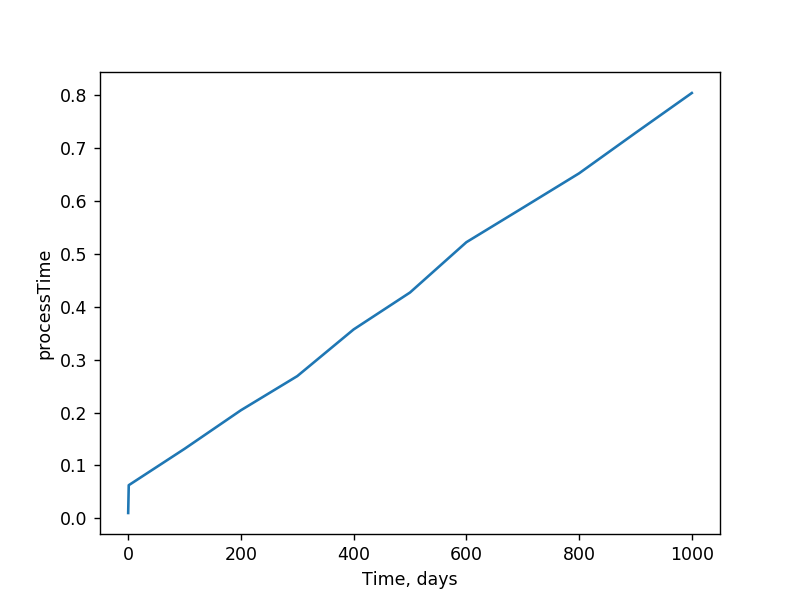

In [12]:
%matplotlib notebook

res.plot('processTime')

The user can also specify whether days or MWd/kg should be used in x-axis. User-defined axis and legend can be given

In [ ]:
res.metadata['']

<IPython.core.display.Javascript object>


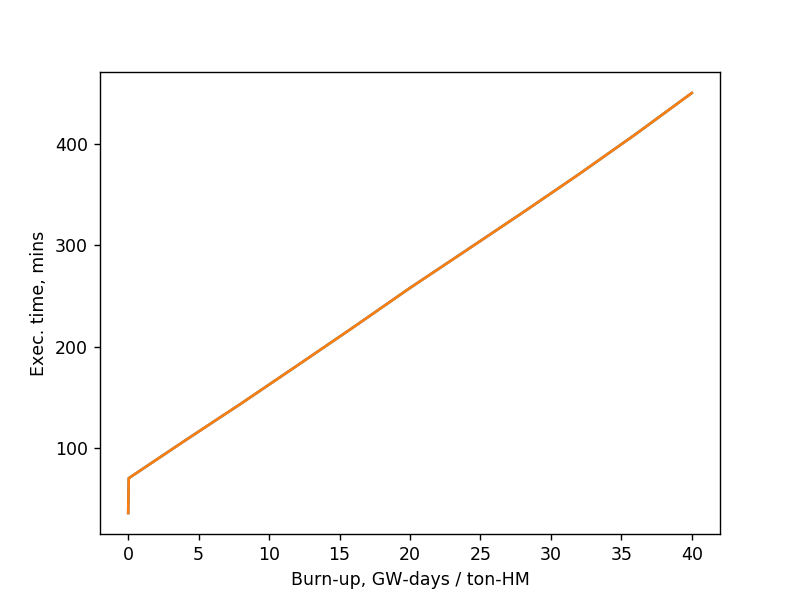

In [11]:
%matplotlib notebook

res.plot('runningTime', 'burnup', None, 'Burn-up, GW-days / ton-HM', 'Exec. time, mins')

# Universe Data (univdata)

These results are stored in a container. The results include cross-sections, kinetic parameters, fluxes, etc. 
The results are stored for each universe at unique burnup steps. If there are 'N' universes and 'M', it will result in N x M state points. In order to retrieve a specific result, the user needs to know these state points. 

The keys of .univdata correspond to a specific state ('universe', burnup, burnupIndex, days)

In [12]:
res.univdata.keys()  # obtain all the state-points

dict_keys([('1101', 0.0, 0.0, 0.0), ('2101', 0.0, 0.0, 0.0), ('3101', 0.0, 0.0, 0.0), ('4101', 0.0, 0.0, 0.0), ('5101', 0.0, 0.0, 0.0), ('1101', 0.040000000000000001, 1.0, 1.0), ('2101', 0.040000000000000001, 1.0, 1.0), ('3101', 0.040000000000000001, 1.0, 1.0), ('4101', 0.040000000000000001, 1.0, 1.0), ('5101', 0.040000000000000001, 1.0, 1.0), ('1101', 4.0, 2.0, 100.0), ('2101', 4.0, 2.0, 100.0), ('3101', 4.0, 2.0, 100.0), ('4101', 4.0, 2.0, 100.0), ('5101', 4.0, 2.0, 100.0), ('1101', 8.0, 3.0, 200.0), ('2101', 8.0, 3.0, 200.0), ('3101', 8.0, 3.0, 200.0), ('4101', 8.0, 3.0, 200.0), ('5101', 8.0, 3.0, 200.0), ('1101', 12.0, 4.0, 300.0), ('2101', 12.0, 4.0, 300.0), ('3101', 12.0, 4.0, 300.0), ('4101', 12.0, 4.0, 300.0), ('5101', 12.0, 4.0, 300.0), ('1101', 16.0, 5.0, 400.0), ('2101', 16.0, 5.0, 400.0), ('3101', 16.0, 5.0, 400.0), ('4101', 16.0, 5.0, 400.0), ('5101', 16.0, 5.0, 400.0), ('1101', 20.0, 6.0, 500.0), ('2101', 20.0, 6.0, 500.0), ('3101', 20.0, 6.0, 500.0), ('4101', 20.0, 6.0, 

Basic information on each state point, can be obtained as follows:

In [13]:
print(res.univdata[('5101', 8, 3, 200)].name)  # universe 
print(res.univdata[('5101', 8, 3, 200)].day)   # days
print(res.univdata[('5101', 8, 3, 200)].bu)    # burnup
print(res.univdata[('5101', 8, 3, 200)].step)  # time-index 

5101
200.0
8.0
3.0


In [14]:
len(res.univdata)  # number of state points

60

In [15]:
states = [st for st in res.univdata.keys()]  # obtain all the data points

In [16]:
st0 = res.univdata[states[0]]  # select the first state point

In [17]:
st0.infExp['infFlx']  # flux (value +- uncertainy) for each energy

array([  5.80639000e+13,   7.86900000e-02,   8.87789000e+14,
         1.98000000e-02,   3.77826000e+15,   8.87000000e-03,
         8.20609000e+15,   9.79000000e-03,   1.38558000e+16,
         7.44000000e-03,   2.14410000e+16,   7.58000000e-03,
         3.64456000e+16,   7.66000000e-03,   5.17490000e+16,
         5.88000000e-03,   5.00272000e+16,   2.61000000e-03,
         5.28371000e+16,   3.53000000e-03,   4.30764000e+16,
         1.91000000e-03,   3.12811000e+16,   3.37000000e-03,
         2.04188000e+16,   2.82000000e-03,   2.58777000e+16,
         3.07000000e-03,   1.26579000e+16,   6.83000000e-03,
         5.39666000e+15,   9.05000000e-03,   4.02981000e+15,
         1.93300000e-02,   1.22935000e+15,   9.75000000e-03,
         3.94119000e+15,   7.13000000e-03,   2.20502000e+15,
         1.51300000e-02,   1.17062000e+15,   1.12200000e-02,
         4.18332000e+14,   1.64400000e-02,   5.42951000e+14,
         3.75800000e-02,   6.36278000e+14,   2.08200000e-02])

Obtain just the values (without uncertainties)

In [18]:
st0.infExp['infFlx'][0::2]

array([  5.80639000e+13,   8.87789000e+14,   3.77826000e+15,
         8.20609000e+15,   1.38558000e+16,   2.14410000e+16,
         3.64456000e+16,   5.17490000e+16,   5.00272000e+16,
         5.28371000e+16,   4.30764000e+16,   3.12811000e+16,
         2.04188000e+16,   2.58777000e+16,   1.26579000e+16,
         5.39666000e+15,   4.02981000e+15,   1.22935000e+15,
         3.94119000e+15,   2.20502000e+15,   1.17062000e+15,
         4.18332000e+14,   5.42951000e+14,   6.36278000e+14])

Plot flux as a function of energy

<IPython.core.display.Javascript object>


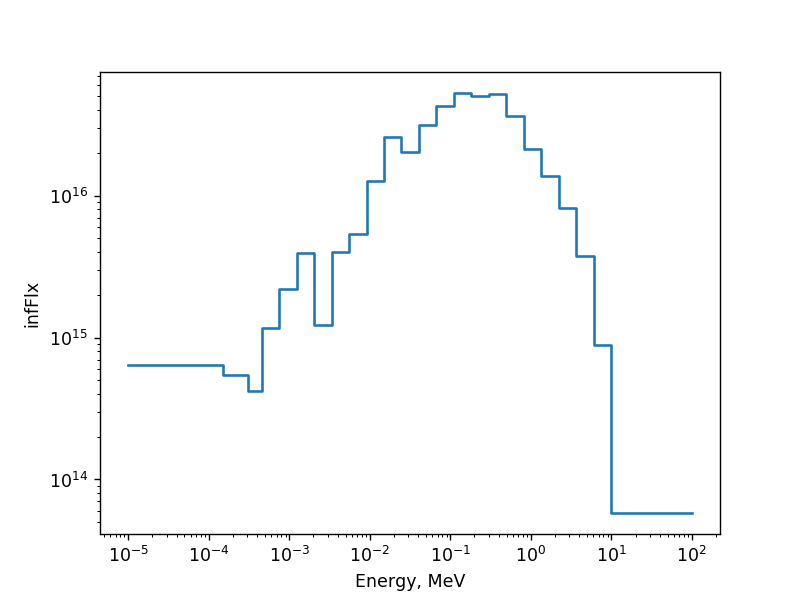

In [19]:
%matplotlib notebook
res.plot('infFlx', None, states[0])

Cross-section data is contained in two main dictionaries: 
'infExp' and 'b1Exp' (critical spectrum corrected)

In [20]:
st0.infExp

{'b1Kinf': array([ 1.4236 ,  0.00281]),
 'infAbs': array([ 0.0163394 ,  0.03734   ,  0.0124982 ,  0.01247   ,  0.00788528,
         0.00469   ,  0.00789007,  0.00592   ,  0.00713999,  0.0059    ,
         0.00420814,  0.00271   ,  0.0033944 ,  0.00171   ,  0.00300499,
         0.00271   ,  0.00310885,  0.00257   ,  0.00340702,  0.00158   ,
         0.00407332,  0.00188   ,  0.005136  ,  0.00216   ,  0.00656252,
         0.00214   ,  0.00747963,  0.00344   ,  0.00919011,  0.00229   ,
         0.0115034 ,  0.00426   ,  0.0127632 ,  0.00338   ,  0.0169427 ,
         0.00409   ,  0.0184948 ,  0.01015   ,  0.0273289 ,  0.01435   ,
         0.0298136 ,  0.00767   ,  0.0333001 ,  0.02373   ,  0.0491465 ,
         0.01859   ,  0.0835045 ,  0.00665   ]),
 'infCapt': array([ 0.00458171,  0.01619   ,  0.00192064,  0.01195   ,  0.00055734,
         0.00878   ,  0.00042319,  0.00485   ,  0.00067225,  0.00572   ,
         0.00113712,  0.00292   ,  0.00126438,  0.00145   ,  0.0013183 ,
         0.002

<IPython.core.display.Javascript object>


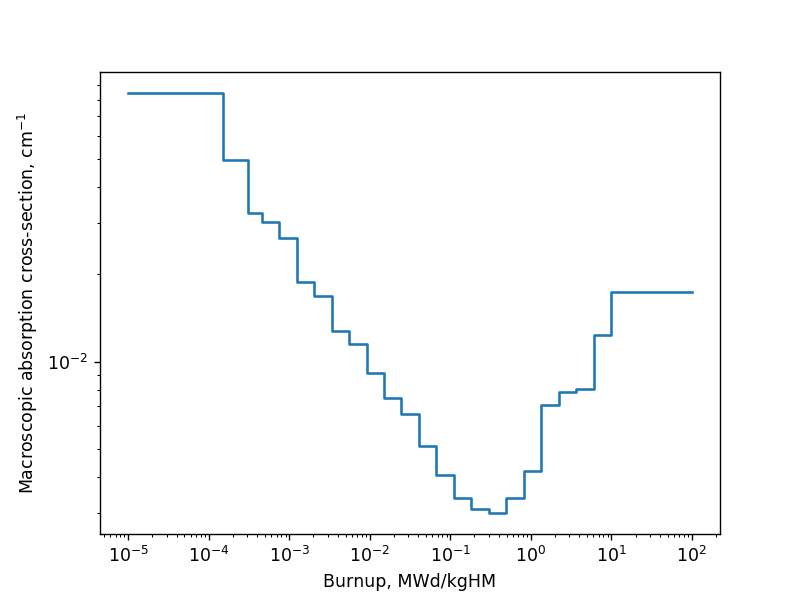

In [21]:
%matplotlib notebook
res.plot('infAbs', 'burnup', states[5], 'Burnup, MWd/kgHM','Macroscopic absorption cross-section, cm$^{-1}$')

Plot b1 critical spectrum cross-sections

<IPython.core.display.Javascript object>


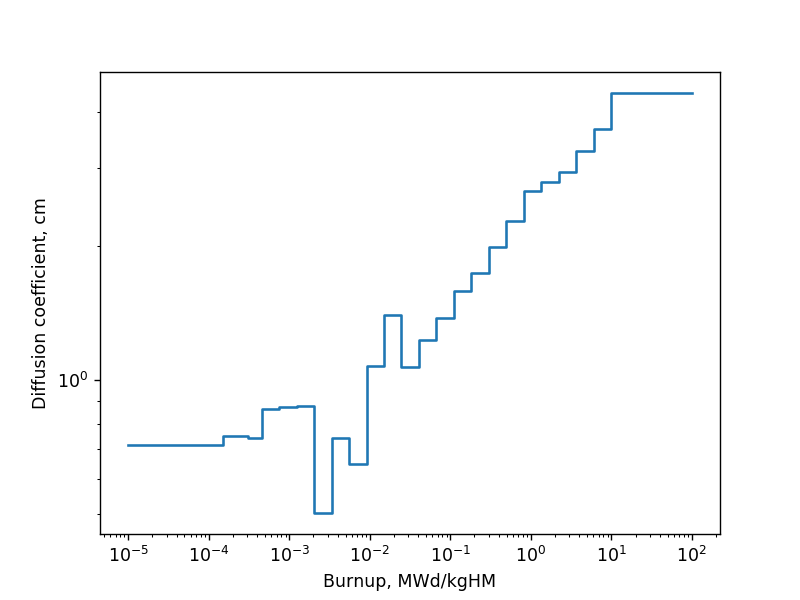

In [23]:
%matplotlib notebook
res.plot('b1Diffcoef', 'burnup', states[5], 'Burnup, MWd/kgHM','Diffusion coefficient, cm')